In [1]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import pickle

# BBC Food

In [26]:
#sayfalar arasında gezin ve ilan linklerini topla

african = []
american = []
british = []
caribbean = []
chinese = []
easteuropean = []
french = []
greek = []
indian = []
irish = []
italian = []
japanese = []
korean = []
mexican = []
nordic = []
northafrican = []
pakistani = []
portuguese = []
southamerican = []
spanish = []
thaisoutheastasian = []
turkishmiddleeastern = []


courses = ["main_course","side_dishes","light_meals_snacks","desserts","starters_nibbles","recipe","brunch",
           "cakes_and_baking","drinks_and_cocktails","other"]

In [27]:
#Yemek linklerini alalım (href)
def href_links(url, courses, liste):
    for i in range(10,30,1):
        url1 = url + str(i+1)
        html = urlopen(url1)
        soup = BeautifulSoup(html, "html.parser") 
        for course in courses:
            class_pro = "promo promo__" + course
            href = [div.get('href') for div in soup.find_all(class_ = class_pro)]
            liste.append(href)
    liste = [j for sub in liste for j in sub]            
    return liste

In [28]:
#Yiyeceklerin bilgilerini alalım
ingredient = []
explanation = []
method = []

def icindekiler(cuisine):
    for i, value in enumerate(cuisine):
        link_html = urlopen(value)
        link_soup = BeautifulSoup(link_html, "html.parser")
        #içindekiler
        try:
            ing = link_soup.find("div", {"class" : "recipe-ingredients-wrapper"})
            ingredient.append(ing.text) 
        except:
            ingredient.append("None")
        #yemek açıklaması
        try:
            exp = link_soup.find("p", {"class" : "recipe-description__text"})
            explanation.append(exp.text) 
        except:
            explanation.append("None")
        #yapım aşamaları
        try:
            met = link_soup.find("div", {"class" : "recipe-method-wrapper"})
            method.append(met.text) 
        except:
            method.append("None")
            
    return ingredient, explanation, method

In [5]:
#AFRİKA MUTFAGI

url = "https://www.bbc.co.uk/food/search?cuisines=african&page="
african = href_links(url, courses, african)

africa = []
for i, value in enumerate(african):
    get_url = "https://www.bbc.co.uk" + value
    africa.append(get_url) 
    
icindekiler(africa)
afrika = pd.DataFrame(list(zip(ingredient, explanation, method)), 
               columns =['Ingredients', 'Explanation','Method']) 

ingredient = []
explanation = []
method = []

afrika["Cuisine"] = "African"

afrika

,Ingredients,Explanation,Method,Cuisine
0,"Ingredients2 large red or orange peppers, de-s...",This easy vegan traybake contains just five in...,MethodPreheat the oven to 220C/200C Fan/Gas 7....,African
1,Ingredients350g/12oz dried black-eyed beans900...,A West African take on a classic hotpot. .,MethodCook the dried beans in a large pan of b...,African
2,IngredientsFor the bobotie50ml/2fl oz olive oi...,None,MethodPreheat the oven to 180C/375F/Gas 4.Heat...,African
3,"Ingredientsbutter, for greasing400ml/14fl oz f...",A dish that Prince Harry enjoyed while on his ...,MethodPreheat the oven to 180C/160C Fan/Gas 4 ...,African
4,"Ingredients1 tbsp olive oil1 onion, thinly sli...",Bunny chow is a traditional South African curr...,MethodHeat the oil in a large pan over a mediu...,African
5,Ingredients2 tbsp vegetable oil½ tsp cumin see...,People from Durban are very proud of their Bun...,MethodHeat the oil in a pan and sauté the whol...,African
6,Ingredients1 tsp cloves1 tsp fennel seeds 1 ts...,"A tangy, South African-inspired vegan curry th...",MethodToast the spices in a dry frying pan ove...,African
7,IngredientsFor the chicken bastilla3 tbsp oliv...,The bastilla is a famous chicken pie from Moro...,MethodHeat the olive oil in a large saucepan. ...,African
8,Ingredients12 peppercorns2 cardamom pods12 clo...,Tomato bredie is a South African stew flavoure...,"MethodTie up the peppercorns, cardamom pods an...",African
9,IngredientsFor the pork chops80g/3oz salt1 tsp...,Blatjang is a rich and fruity Cape Malay condi...,"MethodTo make the pork chops, put the salt, co...",African


In [11]:
afrika.to_csv("afrika.csv")

In [6]:
#AMERİKA MUTFAGI

url = "https://www.bbc.co.uk/food/search?cuisines=american&page="
american = href_links(url, courses, american)

america = []
for i, value in enumerate(american):
    get_url = "https://www.bbc.co.uk" + value
    america.append(get_url) 
    
icindekiler(america)
amerika = pd.DataFrame(list(zip(ingredient, explanation, method)), 
               columns =['Ingredients', 'Explanation','Method']) 

ingredient = []
explanation = []
method = []

amerika["Cuisine"] = "American"

amerika

,Ingredients,Explanation,Method,Cuisine
0,"Ingredients¼ red onion, thinly sliced400g tin ...",Avocado salads are quick and easy to make and ...,MethodSoak the onion in a small bowl of cold w...,American
1,IngredientsFor the ribs2kg/2lb 4oz baby back p...,"Good things come to those who wait, and these ...","MethodFor the ribs, place the rib racks into a...",American
2,IngredientsFor the base100g/4oz plain chocolat...,Mary Berry adds a swirl of cocoa to this baked...,MethodPreheat the oven to 160C/325F/Gas 3. Lig...,American
3,IngredientsFor the filling750g/1lb 10oz Bramle...,None,"MethodPeel, core and cut the apples into chunk...",American
4,"Ingredients200g/7oz white chocolate, roughly c...",Nadiya's rocky road is a mixture of marshmallo...,MethodLightly grease the inside of a 23cm/9in ...,American
...,...,...,...,...
300,IngredientsFor the cheesecake base200g/7oz dig...,Swirl luscious blackberry sauce through this r...,MethodPreheat the oven to 130C/250F/Gas½. Line...,American
301,Ingredients3 tbsp ground flaxseed200g/7oz vega...,"We've done it! We've created the perfect, fudg...",MethodPreheat the oven to 170C/150C Fan/Gas 3....,American
302,Ingredients200g/7oz dairy-free margarine125g/4...,It only takes about half an hour to get a batc...,MethodPreheat the oven to 180C/160C Fan/Gas 4 ...,American
303,"Ingredients100g/3½oz spelt, wholemeal or plain...",These vegan oatmeal and raisin cookies are qui...,MethodPreheat the oven to 180C/160C Fan/Gas 4....,American


In [9]:
amerika.to_csv("amerika.csv")

In [24]:
#İNGİLİZ MUTFAGI

url = "https://www.bbc.co.uk/food/search?cuisines=british&page="
british = href_links(url, courses, british)

britain = []
for i, value in enumerate(british):
    get_url = "https://www.bbc.co.uk" + value
    britain.append(get_url) 


In [ ]:
icindekiler(britain)
ingiliz = pd.DataFrame(list(zip(ingredient, explanation, method)), 
               columns =['Ingredients', 'Explanation','Method']) 

ingredient = []
explanation = []
method = []

ingiliz["Cuisine"] = "British"

ingiliz.to_csv("ingiliz3.csv")

In [7]:
#KARAYİP MUTFAGI

url = "https://www.bbc.co.uk/food/search?cuisines=caribbean&page="
caribbean = href_links(url, courses, caribbean)

carr = []
for i, value in enumerate(caribbean):
    get_url = "https://www.bbc.co.uk" + value
    carr.append(get_url) 

In [9]:
icindekiler(carr)
karayip = pd.DataFrame(list(zip(ingredient, explanation, method)), 
               columns =['Ingredients', 'Explanation','Method']) 

ingredient = []
explanation = []
method = []

karayip["Cuisine"] = "Caribbean"

karayip

karayip.to_csv("karayip.csv")

In [10]:
#ÇİN MUTFAGI

url = "https://www.bbc.co.uk/food/search?cuisines=chinese&page="
chinese = href_links(url, courses, chinese)

china = []
for i, value in enumerate(chinese):
    get_url = "https://www.bbc.co.uk" + value
    china.append(get_url) 
    

In [11]:
icindekiler(china)
cin = pd.DataFrame(list(zip(ingredient, explanation, method)), 
               columns =['Ingredients', 'Explanation','Method']) 

ingredient = []
explanation = []
method = []

cin["Cuisine"] = "Chinese"

cin.to_csv("cin.csv")

In [13]:
#EAST EUROPEAN MUTFAGI

url = "https://www.bbc.co.uk/food/search?cuisines=east_european&page="
easteuropean = href_links(url, courses, easteuropean)

east = []
for i, value in enumerate(easteuropean):
    get_url = "https://www.bbc.co.uk" + value
    east.append(get_url) 

In [14]:
icindekiler(east)
doguavp = pd.DataFrame(list(zip(ingredient, explanation, method)), 
               columns =['Ingredients', 'Explanation','Method']) 

ingredient = []
explanation = []
method = []

doguavp["Cuisine"] = "East European"

doguavp

,Ingredients,Explanation,Method,Cuisine
0,Ingredients70g/2½oz butter1 tbsp olive oil1.2k...,"Tavë kosi is a national dish in Albania, but I...",MethodPreheat the oven to 180C/160C Fan/Gas 4....,East European
1,"Ingredients500g/1lb sirloin steak, trimmed and...",None,MethodWarm a frying pan on the stove until ver...,East European
2,"Ingredients675g/1½ lb beef fillet, preferably ...",Rick Stein cooks up a classic Russian beef str...,MethodCut the steak into slices 1cm/0.5in thic...,East European
3,IngredientsFor the beef stroganoff75g/3oz butt...,"Nothing is so easy, elegant and delicious as a...","MethodHeat a frying pan until hot, then add ha...",East European
4,Ingredients1kg/2lb 4oz braising steak or venis...,This is a main meal soup – a soup for heroes. ...,MethodTrim the meat and cut it into bite-sized...,East European
...,...,...,...,...
149,"Ingredients600g/1lb 5oz beef fillet, cut into ...",This is a super speedy beef stroganoff but sti...,MethodSeason the beef fillets with salt and pe...,East European
150,Ingredients6 large thick-cut pork chops1 tsp g...,For a true taste of Croatia try this wonderful...,MethodSeason the pork chops with salt and pepp...,East European
151,IngredientsFor the crystallised mint leaveshan...,These sweet pierogi topped with crystallised m...,"MethodFor the crystallised mint leaves, lightl...",East European
152,IngredientsFor the vodka strawberries100ml/3½f...,Inspired by their travels in Eastern Europe th...,"MethodFor the vodka strawberries, pour the vod...",East European


In [15]:
doguavp.to_csv("doguavp.csv")

In [10]:
#FRANSIZ MUTFAGI

url = "https://www.bbc.co.uk/food/search?cuisines=french&page="
french = href_links(url, courses, french)

france = []
for i, value in enumerate(french):
    get_url = "https://www.bbc.co.uk" + value
    france.append(get_url) 


In [11]:
icindekiler(france)
fransa = pd.DataFrame(list(zip(ingredient, explanation, method)), 
               columns =['Ingredients', 'Explanation','Method']) 

ingredient = []
explanation = []
method = []

fransa["Cuisine"] = "French"

fransa.to_csv("fransa.csv")

In [21]:
#YUNAN MUTFAGI

url = "https://www.bbc.co.uk/food/search?cuisines=greek&page="
greek = href_links(url, courses, greek)

greece = []
for i, value in enumerate(greek):
    get_url = "https://www.bbc.co.uk" + value
    greece.append(get_url) 
    
icindekiler(greece)
yunan = pd.DataFrame(list(zip(ingredient, explanation, method)), 
               columns =['Ingredients', 'Explanation','Method']) 

ingredient = []
explanation = []
method = []

yunan["Cuisine"] = "Greek"

yunan.to_csv("yunan.csv")

In [12]:
#HİNT MUTFAGI

url = "https://www.bbc.co.uk/food/search?cuisines=indian&page="
indian = href_links(url, courses, indian)

india = []
for i, value in enumerate(indian):
    get_url = "https://www.bbc.co.uk" + value
    india.append(get_url) 


In [13]:
icindekiler(india)
hint = pd.DataFrame(list(zip(ingredient, explanation, method)), 
               columns =['Ingredients', 'Explanation','Method']) 

ingredient = []
explanation = []
method = []

hint["Cuisine"] = "Indian"

hint.to_csv("hint.csv")

In [25]:
#IRLANDA MUTFAGI

url = "https://www.bbc.co.uk/food/search?cuisines=irish&page="
irish = href_links(url, courses, irish)

ireland = []
for i, value in enumerate(irish):
    get_url = "https://www.bbc.co.uk" + value
    ireland.append(get_url) 
    
icindekiler(ireland)
irlanda = pd.DataFrame(list(zip(ingredient, explanation, method)), 
               columns =['Ingredients', 'Explanation','Method']) 

ingredient = []
explanation = []
method = []

irlanda["Cuisine"] = "Irish"

irlanda.to_csv("irlanda.csv")

In [ ]:
#ITALYAN MUTFAGI

url = "https://www.bbc.co.uk/food/search?cuisines=italian&page="
italian = href_links(url, courses, italian)

italy = []
for i, value in enumerate(italian):
    get_url = "https://www.bbc.co.uk" + value
    italy.append(get_url) 
    
icindekiler(italy)
italya = pd.DataFrame(list(zip(ingredient, explanation, method)), 
               columns =['Ingredients', 'Explanation','Method']) 

ingredient = []
explanation = []
method = []

italya["Cuisine"] = "Italian"

italya.to_csv("italya1.csv")

In [5]:
#JAPON MUTFAGI

url = "https://www.bbc.co.uk/food/search?cuisines=japanese&page="
japanese = href_links(url, courses, japanese)


japan = []
for i, value in enumerate(japanese):
    get_url = "https://www.bbc.co.uk" + value
    japan.append(get_url) 
    
icindekiler(japan)
japonya = pd.DataFrame(list(zip(ingredient, explanation, method)), 
               columns =['Ingredients', 'Explanation','Method']) 

ingredient = []
explanation = []
method = []

japonya["Cuisine"] = "Japanese"

japonya.to_csv("japonya.csv")

In [30]:
#KORE MUTFAGI

url = "https://www.bbc.co.uk/food/search?cuisines=korean&page="
korean = href_links(url, courses, korean)

korea = []
for i, value in enumerate(korean):
    get_url = "https://www.bbc.co.uk" + value
    korea.append(get_url) 
    
icindekiler(korea)
kore = pd.DataFrame(list(zip(ingredient, explanation, method)), 
               columns =['Ingredients', 'Explanation','Method']) 

ingredient = []
explanation = []
method = []

kore["Cuisine"] = "Korean"

kore.to_csv("kore.csv")

In [31]:
#MEKSİKA MUTFAGI

url = "https://www.bbc.co.uk/food/search?cuisines=mexican&page="
mexican = href_links(url, courses, mexican)

mexico = []
for i, value in enumerate(mexican):
    get_url = "https://www.bbc.co.uk" + value
    mexico.append(get_url) 
    
icindekiler(mexico)
meksika = pd.DataFrame(list(zip(ingredient, explanation, method)), 
               columns =['Ingredients', 'Explanation','Method']) 

ingredient = []
explanation = []
method = []

meksika["Cuisine"] = "Mexican"

meksika.to_csv("meksika.csv")

In [5]:
#NORDİK MUTFAGI

url = "https://www.bbc.co.uk/food/search?cuisines=nordic&page="
nordic = href_links(url, courses, nordic)

nord = []
for i, value in enumerate(nordic):
    get_url = "https://www.bbc.co.uk" + value
    nord.append(get_url) 
    
icindekiler(nord)
nordik = pd.DataFrame(list(zip(ingredient, explanation, method)), 
               columns =['Ingredients', 'Explanation','Method']) 

ingredient = []
explanation = []
method = []

nordik["Cuisine"] = "Nordic"

nordik.to_csv("nordik.csv")

In [35]:
#KUZEY AFRİKA MUTFAGI

url = "https://www.bbc.co.uk/food/search?cuisines=north_african&page="
northafrican = href_links(url, courses, northafrican)

north = []
for i, value in enumerate(northafrican):
    get_url = "https://www.bbc.co.uk" + value
    north.append(get_url) 
    
icindekiler(north)
kuzeyafr = pd.DataFrame(list(zip(ingredient, explanation, method)), 
               columns =['Ingredients', 'Explanation','Method']) 

ingredient = []
explanation = []
method = []

kuzeyafr["Cuisine"] = "North African"

kuzeyafr.to_csv("kuzeyafr.csv")

In [6]:
#PAKİSTAN MUTFAGI

url = "https://www.bbc.co.uk/food/search?cuisines=pakistani&page="
pakistani = href_links(url, courses, pakistani)

paki = []
for i, value in enumerate(pakistani):
    get_url = "https://www.bbc.co.uk" + value
    paki.append(get_url) 
    
icindekiler(paki)
pakistan = pd.DataFrame(list(zip(ingredient, explanation, method)), 
               columns =['Ingredients', 'Explanation','Method']) 

ingredient = []
explanation = []
method = []

pakistan["Cuisine"] = "Pakistani"

pakistan.to_csv("pakistan.csv")

In [6]:
#PORTEKİZ MUTFAGI

url = "https://www.bbc.co.uk/food/search?cuisines=portuguese&page="
portuguese = href_links(url, courses, portuguese)

portugal = []
for i, value in enumerate(portuguese):
    get_url = "https://www.bbc.co.uk" + value
    portugal.append(get_url) 
    
icindekiler(portugal)
portekiz = pd.DataFrame(list(zip(ingredient, explanation, method)), 
               columns =['Ingredients', 'Explanation','Method']) 

ingredient = []
explanation = []
method = []

portekiz["Cuisine"] = "Portuguese"

portekiz.to_csv("portekiz.csv")

In [8]:
#GÜNEY AMERİKA MUTFAGI

url = "https://www.bbc.co.uk/food/search?cuisines=south_american&page="
southamerican = href_links(url, courses, southamerican)

southamerica = []
for i, value in enumerate(southamerican):
    get_url = "https://www.bbc.co.uk" + value
    southamerica.append(get_url) 
    
icindekiler(southamerica)
guneyamerika = pd.DataFrame(list(zip(ingredient, explanation, method)), 
               columns =['Ingredients', 'Explanation','Method']) 

ingredient = []
explanation = []
method = []

guneyamerika["Cuisine"] = "South American"

guneyamerika.to_csv("guneyamerika.csv")

In [7]:
#İSPANYA MUTFAGI

url = "https://www.bbc.co.uk/food/search?cuisines=spanish&page="
spanish = href_links(url, courses, spanish)

spain = []
for i, value in enumerate(spanish):
    get_url = "https://www.bbc.co.uk" + value
    spain.append(get_url) 
    
icindekiler(spain)
ispanya = pd.DataFrame(list(zip(ingredient, explanation, method)), 
               columns =['Ingredients', 'Explanation','Method']) 

ingredient = []
explanation = []
method = []

ispanya["Cuisine"] = "Spain"

ispanya.to_csv("ispanya.csv")

In [10]:
#Thai and South-East Asian MUTFAGI

url = "https://www.bbc.co.uk/food/search?cuisines=thai_and_south-east_asian&page="
thaisoutheastasian = href_links(url, courses, thaisoutheastasian)

thai = []
for i, value in enumerate(thaisoutheastasian):
    get_url = "https://www.bbc.co.uk" + value
    thai.append(get_url) 
    
icindekiler(thai)
asya = pd.DataFrame(list(zip(ingredient, explanation, method)), 
               columns =['Ingredients', 'Explanation','Method']) 

ingredient = []
explanation = []
method = []

asya["Cuisine"] = "Thai and South-East Asian"

asya.to_csv("asya.csv")

In [11]:
#TÜRK MUTFAGI

url = "https://www.bbc.co.uk/food/search?cuisines=turkish_and_middle_eastern&page="
turkishmiddleeastern = href_links(url, courses, turkishmiddleeastern)

turk = []
for i, value in enumerate(turkishmiddleeastern):
    get_url = "https://www.bbc.co.uk" + value
    turk.append(get_url) 
    
icindekiler(turk)
turkiye = pd.DataFrame(list(zip(ingredient, explanation, method)), 
               columns =['Ingredients', 'Explanation','Method']) 

ingredient = []
explanation = []
method = []

turkiye["Cuisine"] = "Turkish and Middle Eastern"

turkiye.to_csv("turkiye.csv")

# EPICURIOUS

In [ ]:
url = "https://www.epicurious.com/search/?cuisine="

In [ ]:
#Meksika yemeklerini href listesine ekledik
meksika = []
for i in (["mexican"]):
    for j in range(60):
        url1 = url+i+"&page="+str(j+1)
        html = urlopen(url1)
        soup = BeautifulSoup(html, "html.parser")  
        href = [div.a.get('href') for div in soup.find_all(class_='recipe-panel')]
        meksika.append(href)

meksika = [j for sub in meksika for j in sub]

mexican = []
for i, value in enumerate(meksika):
    get_url = "https://www.epicurious.com/" + value
    mexican.append(get_url)  

ingredient = []
explanation = []
method = []

for i, value in enumerate(mexican):
    link_html = urlopen(value)
    link_soup = BeautifulSoup(link_html, "html.parser")
        #içindekiler
    try:
        ing = link_soup.find("ul", {"class" : "ingredients"})
        ingredient.append(ing.text) 
    except:
        ingredient.append("None")
        #yemek açıklaması
    try:
        exp = link_soup.find("div", {"class" : "dek"})
        explanation.append(exp.text) 
    except:
        explanation.append("None")
        #yapım aşamaları
    try:
        met = link_soup.find("ol", {"class" : "preparation-steps"})
        method.append(met.text) 
    except:
        method.append("None")


meksika = pd.DataFrame(list(zip(ingredient, explanation, method)), 
               columns =['Ingredients', 'Explanation','Method']) 

meksika.to_csv("meksikaepicur.csv")

In [ ]:
#ispanya
ispanya = []
for i in (["spanish-portuguese"]):
    for j in range(15):
        url1 = url+"european%2C"+ i + "&page="+str(j+1)
        html = urlopen(url1)
        soup = BeautifulSoup(html, "html.parser")  
        href = [div.a.get('href') for div in soup.find_all(class_='recipe-panel')]
        ispanya.append(href)
        
ispanya = [j for sub in ispanya for j in sub]

spain = []
for i, value in enumerate(ispanya):
    get_url = "https://www.epicurious.com/" + value
    spain.append(get_url)  

ingredient = []
explanation = []
method = []

for i, value in enumerate(spain):
    link_html = urlopen(value)
    link_soup = BeautifulSoup(link_html, "html.parser")
        #içindekiler
    try:
        ing = link_soup.find("ul", {"class" : "ingredients"})
        ingredient.append(ing.text) 
    except:
        ingredient.append("None")
        #yemek açıklaması
    try:
        exp = link_soup.find("div", {"class" : "dek"})
        explanation.append(exp.text) 
    except:
        explanation.append("None")
        #yapım aşamaları
    try:
        met = link_soup.find("ol", {"class" : "preparation-steps"})
        method.append(met.text) 
    except:
        method.append("None")

ispanya = pd.DataFrame(list(zip(ingredient, explanation, method)), 
               columns =['Ingredients', 'Explanation','Method']) 

ispanya.to_csv("ispanyaepicur.csv")

In [ ]:
#nordik yemeklerini href listesine ekledik
nordik = []
for i in (["scandinavian"]):
    for j in range(8):
        url1 = url+i+"&page="+str(j+1)
        html = urlopen(url1)
        soup = BeautifulSoup(html, "html.parser")  
        href = [div.a.get('href') for div in soup.find_all(class_='recipe-panel')]
        nordik.append(href)

nordik = [j for sub in nordik for j in sub]

scandi = []
for i, value in enumerate(nordik):
    get_url = "https://www.epicurious.com/" + value
    scandi.append(get_url)  

ingredient = []
explanation = []
method = []

for i, value in enumerate(scandi):
    link_html = urlopen(value)
    link_soup = BeautifulSoup(link_html, "html.parser")
        #içindekiler
    try:
        ing = link_soup.find("ul", {"class" : "ingredients"})
        ingredient.append(ing.text) 
    except:
        ingredient.append("None")
        #yemek açıklaması
    try:
        exp = link_soup.find("div", {"class" : "dek"})
        explanation.append(exp.text) 
    except:
        explanation.append("None")
        #yapım aşamaları
    try:
        met = link_soup.find("ol", {"class" : "preparation-steps"})
        method.append(met.text) 
    except:
        method.append("None")
    time.sleep(10)


nordik = pd.DataFrame(list(zip(ingredient, explanation, method)), 
               columns =['Ingredients', 'Explanation','Method']) 

nordik.to_csv("nordikepicur.csv")

In [ ]:
#yunan yemekleri
yunan = []
for i in (["greek"]):
    for j in range(8):
        url1 = url+i+"&page="+str(j+1)
        html = urlopen(url1)
        soup = BeautifulSoup(html, "html.parser")  
        href = [div.a.get('href') for div in soup.find_all(class_='recipe-panel')]
        yunan.append(href)

yunan = [j for sub in yunan for j in sub]

greek = []
for i, value in enumerate(yunan):
    get_url = "https://www.epicurious.com/" + value
    greek.append(get_url)  

ingredient = []
explanation = []
method = []

for i, value in enumerate(greek):
    link_html = urlopen(value)
    link_soup = BeautifulSoup(link_html, "html.parser")
        #içindekiler
    try:
        ing = link_soup.find("ul", {"class" : "ingredients"})
        ingredient.append(ing.text) 
    except:
        ingredient.append("None")
        #yemek açıklaması
    try:
        exp = link_soup.find("div", {"class" : "dek"})
        explanation.append(exp.text) 
    except:
        explanation.append("None")
        #yapım aşamaları
    try:
        met = link_soup.find("ol", {"class" : "preparation-steps"})
        method.append(met.text) 
    except:
        method.append("None")


yunan = pd.DataFrame(list(zip(ingredient, explanation, method)), 
               columns =['Ingredients', 'Explanation','Method']) 

yunan.to_csv("yunanepicur.csv")

In [ ]:
#turk yemekleri
turk = []
for i in (["turkish"]):
    for j in range(3):
        url1 = url+i+"&page="+str(j+1)
        html = urlopen(url1)
        soup = BeautifulSoup(html, "html.parser")  
        href = [div.a.get('href') for div in soup.find_all(class_='recipe-panel')]
        turk.append(href)

turk = [j for sub in turk for j in sub]

turkish = []
for i, value in enumerate(turk):
    get_url = "https://www.epicurious.com/" + value
    turkish.append(get_url)  

ingredient = []
explanation = []
method = []

for i, value in enumerate(turkish):
    link_html = urlopen(value)
    link_soup = BeautifulSoup(link_html, "html.parser")
        #içindekiler
    try:
        ing = link_soup.find("ul", {"class" : "ingredients"})
        ingredient.append(ing.text) 
    except:
        ingredient.append("None")
        #yemek açıklaması
    try:
        exp = link_soup.find("div", {"class" : "dek"})
        explanation.append(exp.text) 
    except:
        explanation.append("None")
        #yapım aşamaları
    try:
        met = link_soup.find("ol", {"class" : "preparation-steps"})
        method.append(met.text) 
    except:
        method.append("None")


turk = pd.DataFrame(list(zip(ingredient, explanation, method)), 
               columns =['Ingredients', 'Explanation','Method']) 

turk.to_csv("turkepi.csv")

In [ ]:
#italyan yemekleri
italyan = []
for i in (["italian"]):
    for j in range(130):
        url1 = url+i+"&page="+str(j+1)
        html = urlopen(url1)
        soup = BeautifulSoup(html, "html.parser")  
        href = [div.a.get('href') for div in soup.find_all(class_='recipe-panel')]
        italyan.append(href)

italyan = [j for sub in italyan for j in sub]

italian = []
for i, value in enumerate(italyan):
    get_url = "https://www.epicurious.com/" + value
    italian.append(get_url)  

ingredient = []
explanation = []
method = []

for i, value in enumerate(italian):
    link_html = urlopen(value)
    link_soup = BeautifulSoup(link_html, "html.parser")
        #içindekiler
    try:
        ing = link_soup.find("ul", {"class" : "ingredients"})
        ingredient.append(ing.text) 
    except:
        ingredient.append("None")
        #yemek açıklaması
    try:
        exp = link_soup.find("div", {"class" : "dek"})
        explanation.append(exp.text) 
    except:
        explanation.append("None")
        #yapım aşamaları
    try:
        met = link_soup.find("ol", {"class" : "preparation-steps"})
        method.append(met.text) 
    except:
        method.append("None")
    time.sleep(4)


italyan = pd.DataFrame(list(zip(ingredient, explanation, method)), 
               columns =['Ingredients', 'Explanation','Method']) 

italyan.to_csv("italyanepi.csv")

# Merging Similar Cuisines

Datayı duzeltelim.

In [2]:

amerika = pd.read_csv("/Users/mervehoroz/Desktop/ISDSA_projects/proje4/data/amerika.csv")
asya = pd.read_csv("/Users/mervehoroz/Desktop/ISDSA_projects/proje4/data/asya.csv")
cin = pd.read_csv("/Users/mervehoroz/Desktop/ISDSA_projects/proje4/data/cin.csv")

fransa = pd.read_csv("/Users/mervehoroz/Desktop/ISDSA_projects/proje4/data/fransa.csv")

hint = pd.read_csv("/Users/mervehoroz/Desktop/ISDSA_projects/proje4/data/hint.csv")
irlanda = pd.read_csv("/Users/mervehoroz/Desktop/ISDSA_projects/proje4/data/irlanda.csv")
ispanya = pd.read_csv("/Users/mervehoroz/Desktop/ISDSA_projects/proje4/data/ispanya.csv")

japonya = pd.read_csv("/Users/mervehoroz/Desktop/ISDSA_projects/proje4/data/japonya.csv")

kore = pd.read_csv("/Users/mervehoroz/Desktop/ISDSA_projects/proje4/data/kore.csv")

meksika = pd.read_csv("/Users/mervehoroz/Desktop/ISDSA_projects/proje4/data/meksika.csv")

pakistan = pd.read_csv("/Users/mervehoroz/Desktop/ISDSA_projects/proje4/data/pakistan.csv")
portekiz = pd.read_csv("/Users/mervehoroz/Desktop/ISDSA_projects/proje4/data/portekiz.csv")
turkiye = pd.read_csv("/Users/mervehoroz/Desktop/ISDSA_projects/proje4/data/turkiye.csv")
yunan = pd.read_csv("/Users/mervehoroz/Desktop/ISDSA_projects/proje4/data/yunan.csv")


#time out alan cuisineleri duzelltim
ingiliz = pd.read_csv("/Users/mervehoroz/Desktop/ISDSA_projects/proje4/data/ingiliz.csv")
ingiliz1 = pd.read_csv("/Users/mervehoroz/Desktop/ISDSA_projects/proje4/data/ingiliz1.csv")
ingiliz2 = pd.read_csv("/Users/mervehoroz/Desktop/ISDSA_projects/proje4/data/ingiliz2.csv")

italya = pd.read_csv("/Users/mervehoroz/Desktop/ISDSA_projects/proje4/data/italya.csv")

ingiliz = pd.concat([ingiliz, ingiliz1, ingiliz2], ignore_index=True)

In [3]:
ispanyaepi = pd.read_csv("/Users/mervehoroz/Desktop/ISDSA_projects/proje4/ispanyaepicur.csv")
yunanepi = pd.read_csv("/Users/mervehoroz/Desktop/ISDSA_projects/proje4/yunanepicur.csv")
turkepi = pd.read_csv("/Users/mervehoroz/Desktop/ISDSA_projects/proje4/turkepi.csv")
meksikaepi = pd.read_csv("/Users/mervehoroz/Desktop/ISDSA_projects/proje4/data/meksikaepicur.csv")
italyaepi = pd.read_csv("/Users/mervehoroz/Desktop/ISDSA_projects/proje4/italyanepi.csv")
italyaepi = italyaepi[1000:]


In [4]:
#asya mutfagı
cin["Cuisine"] = "Asian"
kore["Cuisine"] = "Asian"
japonya["Cuisine"] = "Asian"
asya["Cuisine"] = "Asian"

In [5]:
#india pakistan
hint["Cuisine"] = "Indian/Pakistani"
pakistan["Cuisine"] = "Indian/Pakistani"

In [6]:
#İspanya Portekiz
ispanya["Cuisine"] = "Spain/Portuegese"
ispanyaepi["Cuisine"] = "Spain/Portuegese"
portekiz["Cuisine"] = "Spain/Portuegese"

In [7]:
#irish british birlestirelim
irlanda["Cuisine"] = "British/Irish"
ingiliz["Cuisine"] = "British/Irish"

In [8]:
# epicurious websitesinden aldıgı meksika yemeklerini ekleyelim
meksikaepi["Cuisine"] = "Mexican"

In [9]:
yunanepi["Cuisine"] = "Greek"
turkepi["Cuisine"] = "Turkish"
turkiye["Cuisine"] = "Turkish"

In [10]:
italyaepi["Cuisine"] = "Italian"

In [11]:
bbc = pd.concat([amerika,asya,cin,fransa,hint,irlanda,ispanya,japonya,kore,
                 meksika,pakistan,portekiz,turkiye,yunan,ingiliz,italya], ignore_index=True)

bbc["Ingredients"] = bbc["Ingredients"].str[11:] #ingredients baslıgını dropladık

In [12]:
df1 = pd.concat([bbc, ispanyaepi,italyaepi, meksikaepi,turkepi, yunanepi], ignore_index=True)

In [17]:
df1.drop(columns=["Unnamed: 0"], inplace=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

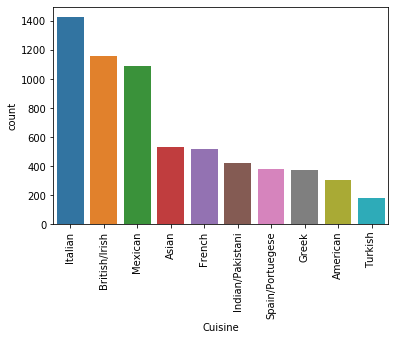

In [18]:
sns.countplot(df1["Cuisine"], order = df1.Cuisine.value_counts().index)
plt.xticks(rotation = 90)

In [21]:
df1

,Ingredients,Explanation,Method,Cuisine
0,"¼ red onion, thinly sliced400g tin cannellini ...",Avocado salads are quick and easy to make and ...,MethodSoak the onion in a small bowl of cold w...,American
1,"For the ribs2kg/2lb 4oz baby back pork ribs, i...","Good things come to those who wait, and these ...","MethodFor the ribs, place the rib racks into a...",American
2,For the base100g/4oz plain chocolate digestive...,Mary Berry adds a swirl of cocoa to this baked...,MethodPreheat the oven to 160C/325F/Gas 3. Lig...,American
3,For the filling750g/1lb 10oz Bramley apples 25...,None,"MethodPeel, core and cut the apples into chunk...",American
4,"200g/7oz white chocolate, roughly chopped (or ...",Nadiya's rocky road is a mixture of marshmallo...,MethodLightly grease the inside of a 23cm/9in ...,American
...,...,...,...,...
6381,2 cups balsamic vinegar4 extra large sea scall...,None,In a s...,Greek
6382,1 3/4 cups all purpose flour1/3 cup powdered s...,"This candy-like tart with hints of rose, orang...",Blend ...,Greek
6383,a 1-pound firm eggplantolive oil for brushing ...,None,Prehea...,Greek
6384,1 pound ground lamb (not too lean)1/4 cup minc...,Can be prepared in 45 minutes or less.,In a b...,Greek


In [20]:
df1.to_pickle("cuisinedata.pkl")